In [61]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as ms

In [1]:
data=pd.read_csv("C:\\Users\\user\\Desktop\\intern data\\resume_dataset.csv")
data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
164,Testing,Computer Skills: â¢ Proficient in MS office (...
165,Testing,â Willingness to accept the challenges. â ...
166,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
167,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [2]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
data.tail()

,Category,Resume
164,Testing,Computer Skills: â¢ Proficient in MS office (...
165,Testing,â Willingness to accept the challenges. â ...
166,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
167,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
168,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [4]:
data['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
164         Testing
165         Testing
166         Testing
167         Testing
168         Testing
Name: Category, Length: 169, dtype: object

In [5]:
data['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
164    Computer Skills: â¢ Proficient in MS office (...
165    â Willingness to accept the challenges. â ...
166    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
167    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
168    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 169, dtype: object

In [6]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [7]:
data['Category'].value_counts()

Java Developer               14
HR                           11
Database                     11
Advocate                     10
Data Science                 10
DotNet Developer              7
Hadoop                        7
Automation Testing            7
DevOps Engineer               7
Testing                       7
Health and fitness            6
Python Developer              6
Arts                          6
Business Analyst              6
Civil Engineer                6
SAP Developer                 6
ETL Developer                 5
Mechanical Engineer           5
Sales                         5
Blockchain                    5
Electrical Engineering        5
Web Designing                 5
Network Security Engineer     5
Operations Manager            4
PMO                           3
Name: Category, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

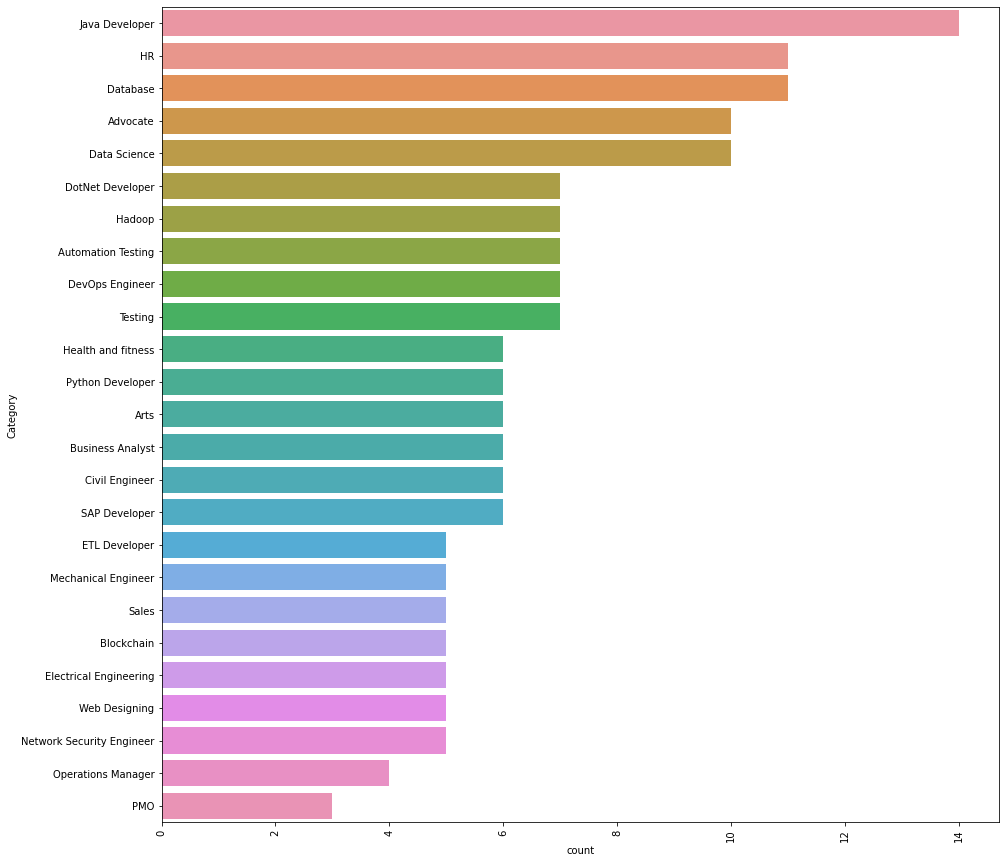

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y='Category',data=data,order=data['Category'].value_counts().index)
plt.show

In [9]:
count=data['Category'].value_counts()
labels=data['Category'].unique()

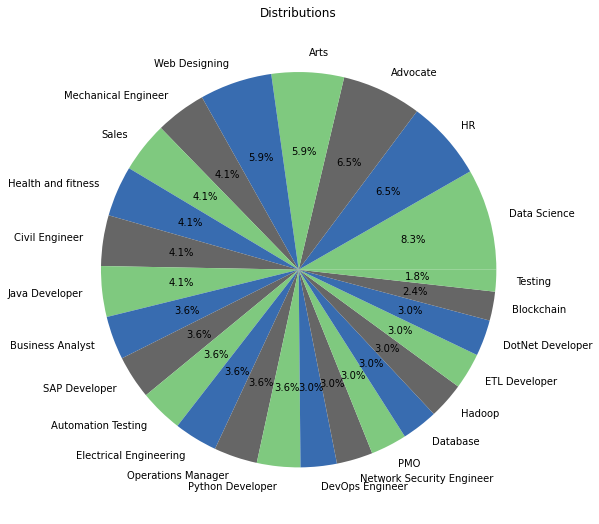

In [10]:
import numpy as np

plt.figure(figsize=(20,20))
from matplotlib.gridspec import GridSpec
grid=GridSpec(2,2)
cmap=plt.get_cmap('Accent')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1],aspect=1,title='Distributions')
pie=plt.pie(count,labels=labels,autopct='%1.1f%%',colors=colors)

In [11]:
def clean_resume(resumeText):

  resumeText=re.sub('http\S+\s*','',resumeText)
  resumeText=re.sub('RT|cc','',resumeText)
  resumeText=re.sub('#\S+','',resumeText)
  resumeText=re.sub('@\S+','',resumeText)
  resumeText=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),'',resumeText)
  resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
  resumeText = re.sub('\s+', ' ', resumeText)  
  return resumeText

data['cleaned_resume'] = data.Resume.apply(lambda x: clean_resume(x))

In [12]:
 data['cleaned_resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 BE UITR...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
164    Computer Skills Proficient in MS office Word B...
165     Willingness to aept the challenges Positive t...
166    PERSONAL SKILLS Quick learner Eagerness to lea...
167    COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Poi...
168    Skill Set OS Windows XP788110 Database MYSQL s...
Name: cleaned_resume, Length: 169, dtype: object

In [13]:
#Wordcloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
set_of_stopwords=set(stopwords.words('english')+['``',"''"])
total=[]
sentences=data['Resume'].values
cleaned=''
for i in range (0,100):
    cleaned_text=clean_resume(sentences[i])
    cleaned+=cleaned_text
    required_words=nltk.word_tokenize(cleaned_text)
    for wrds in required_words:
        if wrds not in set_of_stopwords and wrds not in string.punctuation:
            total.append(wrds)
wrdfrqdist=nltk.FreqDist(total)
most_common=wrdfrqdist.most_common(50)
print(most_common)

[('Details', 305), ('Exprience', 303), ('company', 261), ('months', 253), ('description', 239), ('1', 169), ('Project', 133), ('Maharashtra', 126), ('6', 116), ('year', 114), ('January', 114), ('project', 108), ('Less', 103), ('team', 95), ('data', 88), ('SAP', 81), ('Engineering', 80), ('using', 79), ('Java', 77), ('Education', 73), ('Responsibilities', 72), ('Test', 69), ('monthsCompany', 67), ('Mumbai', 67), ('work', 64), ('India', 63), ('Ltd', 63), ('development', 61), ('test', 60), ('business', 59), ('Pvt', 59), ('Testing', 59), ('application', 59), ('various', 58), ('like', 58), ('Data', 57), ('The', 57), ('Management', 57), ('College', 57), ('requirements', 56), ('Pune', 55), ('reports', 54), ('Company', 54), ('Role', 53), ('Automation', 53), ('Developer', 51), ('SQL', 50), ('sales', 50), ('University', 49), ('Description', 49)]


In [15]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['Category']=LE.fit_transform(data['Category'])
data['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [16]:
requiredText = data['cleaned_resume'].values
requiredTarget = data['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(135, 1500)
(34, 1500)


Using KNeighbors Classification

In [17]:
mod = OneVsRestClassifier(KNeighborsClassifier())
mod.fit(X_train, y_train)
prediction = mod.predict(X_test)

In [77]:
print('Accuracy of Training data by using K-NN: {:.2f}'.format(mod.score(X_train,y_train)))

Accuracy of Training data by using K-NN: 0.89


In [79]:
print('Accuracy of Testing Data by using K-NN: {:.2f}'.format(mod.score(X_test,y_test)))

Accuracy of Testing Data by using K-NN: 0.82


In [20]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           9       1.00      0.75      0.86         4
          11       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         2
          14       1.00      0.67      0.80         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         2
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          20       0.75      1.00      0.86         3
          21       1.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using MultinomialNB

In [65]:
mod2 = OneVsRestClassifier(MultinomialNB()).fit(X_train, y_train)
prediction_MultinomialNB = mod2.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(mod2.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(mod2.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (mod2,classification_report(y_test, prediction)))

Accuracy of MultinomialNB Classifier on training set: 0.83
Accuracy of MultinomialNB Classifier on test set: 0.26

 Classification report for classifier OneVsRestClassifier(estimator=MultinomialNB()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       1.00      0.67      0.80         3
           7       0.25      1.00      0.40         1
           9       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         0
          13       1.00      0.50      0.67         2
          14       0.00      0.00      0.00         3
          15       0.12      1.00      0.22         2
          16       0.00      0.00      0.0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
classifier= OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train)
prediction_logistic = classifier.predict(X_test)

In [81]:
print('Accuracy of Training data by using Logistic Regression: {:.2f}'.format(classifier.score(X_train,y_train)))

Accuracy of Training data by using Logistic Regression: 0.83


In [82]:
print('Accuracy of Testing Data by using Logistic Regression: {:.2f}'.format(classifier.score(X_test,y_test)))

Accuracy of Testing Data by using Logistic Regression: 0.26


In [23]:
print(prediction_logistic[2])
print(y_test[2])
print(classification_report(y_test,prediction_logistic))

7
17
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       1.00      0.67      0.80         3
           7       0.25      1.00      0.40         1
           9       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         0
          13       1.00      0.50      0.67         2
          14       0.00      0.00      0.00         3
          15       0.14      1.00      0.25         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         3
          21       0.00      0.00      0.00         1
          22       0.0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using SVM

In [25]:
SVMclassifier=svm.SVC()
Cval=2.**np.arange(-1,1.2,step=0.2)
print(Cval)

[0.5        0.57434918 0.65975396 0.75785828 0.87055056 1.
 1.14869835 1.31950791 1.51571657 1.74110113 2.        ]


In [26]:
n_grid=[{'C':Cval}]
from sklearn.model_selection import GridSearchCV
cv_svc=GridSearchCV(estimator=SVMclassifier,
        param_grid=n_grid,cv=ms.KFold(n_splits=100))
classifier_svm= OneVsRestClassifier(SVMclassifier).fit(X_train, y_train)

In [27]:
prediction_svm = classifier_svm.predict(X_test)

In [73]:
print('Accuracy of Training data by using SVM: {:.2f}'.format(classifier_svm.score(X_train,y_train)))

Accuracy of Training data by using SVM: 1.00


In [74]:
print('Accuracy of Testing Data by using SVM: {:.2f}'.format(classifier_svm.score(X_test,y_test)))

Accuracy of Testing Data by using SVM: 0.71


In [28]:
from sklearn import metrics
print(classification_report(y_test,prediction_svm))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.75      1.00      0.86         3
           7       0.50      1.00      0.67         1
           9       1.00      0.75      0.86         4
          11       1.00      0.33      0.50         3
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       0.50      1.00      0.67         2
          16       1.00      1.00      1.00         1
          17       1.00      0.50      0.67         2
          20       0.00      0.00      0.00         3
          21       1.00      1.00      1.00         1
          22       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using Random Forest

In [29]:
clf=RandomForestClassifier(n_estimators=100)
classifier_random_forest= OneVsRestClassifier(clf).fit(X_train, y_train)
prediction_random_forest = classifier_random_forest.predict(X_test)

In [30]:
prediction_random_forest

array([ 9, 18,  7,  5, 11, 12,  6, 12,  7,  7, 14,  2,  3, 11, 15, 16, 15,
       18, 13,  2, 12, 20,  0, 11, 18, 16,  0, 13, 15, 18,  6,  0, 17, 24])

In [72]:
print('Accuracy of Training data by using Random Forest Classification: {:.2f}'.format(classifier_random_forest.score(X_train,y_train)))

Accuracy of Training data by using Random Forest Classification: 1.00


In [71]:
print('Accuracy of Testing Data by using Random Forest Classification: {:.2f}'.format(classifier_random_forest.score(X_test,y_test)))

Accuracy of Testing Data by using Random Forest Classification: 0.59


In [31]:
print(classification_report(y_test,prediction_random_forest))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      0.67      0.80         3
           7       0.33      1.00      0.50         1
           9       1.00      0.25      0.40         4
          11       0.67      0.67      0.67         3
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         2
          14       1.00      0.33      0.50         3
          15       0.67      1.00      0.80         2
          16       0.50      1.00      0.67         1
          17       1.00      0.50      0.67         2
          18       0.00      0.00      0.00         0
          20       1.00      0.33      0.50         3
          21       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Created a Data Frame which include all predicted values of K-NN model, Logistic Regression model,  SVM model, Random Forest Classification model and compare these predicted values with true value(Ytest)

In [66]:
Y_true=y_test
Predicted_datas={'True value' : Y_true,
         'predicted values by using KNN': prediction,
                 'predicted values by using MultinomialNB':prediction_MultinomialNB,
                'predicted values by using Logistic Regression':prediction_logistic,
                'predicted values by using svm':prediction_svm,
                'predicted values by using Random Forest':prediction_random_forest}
Predicted_datas=pd.DataFrame(Predicted_datas)
Predicted_datas

,True value,predicted values by using KNN,predicted values by using MultinomialNB,predicted values by using Logistic Regression,predicted values by using svm,predicted values by using Random Forest
0,9,15,15,15,9,9
1,14,12,12,12,14,18
2,17,7,7,7,7,7
3,5,5,5,5,5,5
4,11,15,15,12,12,11
5,22,12,12,12,12,12
6,6,6,6,6,6,6
7,6,12,12,12,6,12
8,21,7,7,7,21,7
9,7,7,7,7,7,7


Correct prediction is come from using KNN

In [60]:
Predicted_datas.columns

Index(['True value', 'predicted values by using KNN',
       'predicted values by using Logistic Regression',
       'predicted values by using svm',
       'predicted values by using Random Forest'],
      dtype='object')

In [68]:
labels=Predicted_datas['True value'].unique()
count=Predicted_data['True value'].value_counts()

labels_KNN=Predicted_datas['predicted values by using KNN'].unique()
count_KNN=Predicted_datas['predicted values by using KNN'].value_counts()

labels_MultinomialNB=Predicted_datas['predicted values by using MultinomialNB'].unique()
count_MultinomialNB=Predicted_datas['predicted values by using MultinomialNB'].value_counts()

labels_Logistic_Regression=Predicted_datas[ 'predicted values by using Logistic Regression'].unique()
count_Logistic_Regression=Predicted_datas[ 'predicted values by using Logistic Regression'].value_counts()

labels_svm=Predicted_datas['predicted values by using svm'].unique()
count_svm=Predicted_datas['predicted values by using svm'].value_counts()

labels_Random_Forest=Predicted_datas['predicted values by using Random Forest'].unique()
count_Random_Forest=Predicted_datas['predicted values by using Random Forest'].value_counts()

Accuracy of Testing Data by using K-NN: 0.82
Accuracy of Testing Data by using Logistic Regression: 0.26
Accuracy of Testing Data by using SVM: 0.71
Accuracy of Testing Data by using Random Forest Classification: 0.59
Accuracy of MultinomialNB Classifier on test set: 0.26


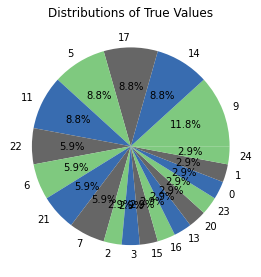

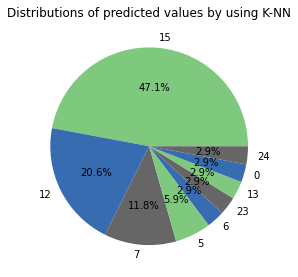

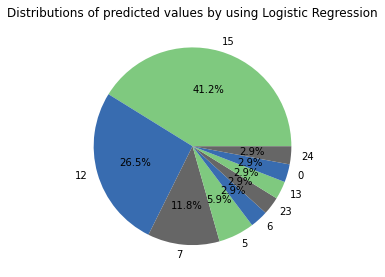

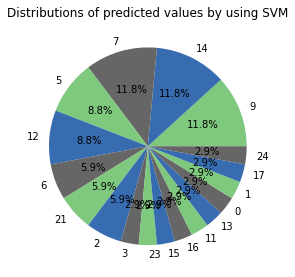

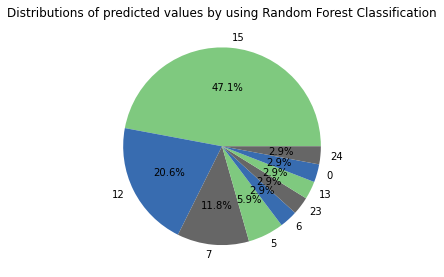

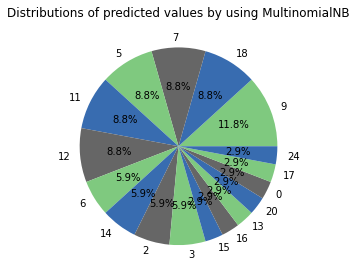

In [80]:
plt.figure(figsize=(10,10))
from matplotlib.gridspec import GridSpec
grid=GridSpec(2,2)
cmap=plt.get_cmap('Accent')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1],aspect=1,title='Distributions of True Values')
pie=plt.pie(count,labels=labels,autopct='%1.1f%%',colors=colors)


plt.figure(figsize=(10,10))
from matplotlib.gridspec import GridSpec
grid=GridSpec(2,2)
cmap=plt.get_cmap('Accent')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1],aspect=1,title='Distributions of predicted values by using K-NN')
pie=plt.pie(count_KNN,labels=labels_KNN,autopct='%1.1f%%',colors=colors)
print('Accuracy of Testing Data by using K-NN: {:.2f}'.format(mod.score(X_test,y_test)))


plt.figure(figsize=(10,10))
from matplotlib.gridspec import GridSpec
grid=GridSpec(2,2)
cmap=plt.get_cmap('Accent')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1],aspect=1,title='Distributions of predicted values by using Logistic Regression')
pie=plt.pie(count_Logistic_Regression,labels=labels_Logistic_Regression,autopct='%1.1f%%',colors=colors)
print('Accuracy of Testing Data by using Logistic Regression: {:.2f}'.format(classifier.score(X_test,y_test)))

plt.figure(figsize=(10,10))
from matplotlib.gridspec import GridSpec
grid=GridSpec(2,2)
cmap=plt.get_cmap('Accent')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1],aspect=1,title='Distributions of predicted values by using SVM')
pie=plt.pie(count_svm,labels=labels_svm,autopct='%1.1f%%',colors=colors)
print('Accuracy of Testing Data by using SVM: {:.2f}'.format(classifier_svm.score(X_test,y_test)))



plt.figure(figsize=(10,10))
from matplotlib.gridspec import GridSpec
grid=GridSpec(2,2)
cmap=plt.get_cmap('Accent')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1],aspect=1,title='Distributions of predicted values by using Random Forest Classification')
pie=plt.pie(count_MultinomialNB,labels=labels_MultinomialNB,autopct='%1.1f%%',colors=colors)
print('Accuracy of Testing Data by using Random Forest Classification: {:.2f}'.format(classifier_random_forest.score(X_test,y_test)))


plt.figure(figsize=(10,10))
from matplotlib.gridspec import GridSpec
grid=GridSpec(2,2)
cmap=plt.get_cmap('Accent')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1],aspect=1,title='Distributions of predicted values by using MultinomialNB')
pie=plt.pie(count_Random_Forest,labels=labels_Random_Forest,autopct='%1.1f%%',colors=colors)
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(mod2.score(X_test, y_test)))

K-NN model is the good model when compared to other models . Because the accuracy of K-NN model is 0.82

In [33]:
Y_true=y_test
Predicted_data={'True value' : Y_true,
         'predicted values by using KNN': prediction}
Predicted_data=pd.DataFrame(Predicted_data)
Predicted_data

,True value,predicted values by using KNN
0,9,15
1,14,12
2,17,7
3,5,5
4,11,15
5,22,12
6,6,6
7,6,12
8,21,7
9,7,7


convert to Json Format

In [34]:
JS=Predicted_data.to_json(orient='records')
print(JS)

[{"True value":9,"predicted values by using KNN":15},{"True value":14,"predicted values by using KNN":12},{"True value":17,"predicted values by using KNN":7},{"True value":5,"predicted values by using KNN":5},{"True value":11,"predicted values by using KNN":15},{"True value":22,"predicted values by using KNN":12},{"True value":6,"predicted values by using KNN":6},{"True value":6,"predicted values by using KNN":12},{"True value":21,"predicted values by using KNN":7},{"True value":7,"predicted values by using KNN":7},{"True value":14,"predicted values by using KNN":12},{"True value":2,"predicted values by using KNN":15},{"True value":3,"predicted values by using KNN":15},{"True value":11,"predicted values by using KNN":23},{"True value":15,"predicted values by using KNN":15},{"True value":16,"predicted values by using KNN":12},{"True value":15,"predicted values by using KNN":15},{"True value":11,"predicted values by using KNN":15},{"True value":13,"predicted values by using KNN":13},{"Tr